In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier , export_text , plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier

In [2]:
data = pd.read_csv('car.csv')

In [3]:
data

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
train , test = train_test_split(data , test_size=0.2 , random_state = 42 , stratify= data['car_acc'])

In [5]:

for c in train.columns:
    print(train[c].value_counts())

high     359
vhigh    357
low      336
med      330
Name: buying, dtype: int64
med      356
low      356
high     343
vhigh    327
Name: maint, dtype: int64
2        359
3        345
5more    342
4        336
Name: doors, dtype: int64
more    479
2       455
4       448
Name: persons, dtype: int64
big      464
med      463
small    455
Name: lug_boot, dtype: int64
high    470
low     465
med     447
Name: safety, dtype: int64
unacc    968
acc      307
good      55
vgood     52
Name: car_acc, dtype: int64


In [6]:
doors = {'1' : 1 , '2' : 2,'3':3,'4':4,'5more':5}
train['doors'] = train['doors'].map(doors)
test['doors'] = test['doors'].map(doors)

C:\Users\popan\AppData\Local\Temp/ipykernel_3248/1969189027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['doors'] = train['doors'].map(doors)
C:\Users\popan\AppData\Local\Temp/ipykernel_3248/1969189027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['doors'] = test['doors'].map(doors)


In [7]:
persons = {'more' : 6 , '2' : 2,'4':4}
train['persons'] = train['persons'].map(persons)
test['persons'] = test['persons'].map(persons)

C:\Users\popan\AppData\Local\Temp/ipykernel_3248/3964578022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['persons'] = train['persons'].map(persons)
C:\Users\popan\AppData\Local\Temp/ipykernel_3248/3964578022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['persons'] = test['persons'].map(persons)


In [8]:
buying = {'low' : 1 , 'med' : 2 , 'high':3 , 'vhigh' : 4}
train['buying'] = train['buying'].map(buying)
test['buying'] = test['buying'].map(buying)
maint = {'low' : 1 , 'med' : 2 , 'high':3 , 'vhigh' : 4}
train['maint'] = train['maint'].map(maint)
test['maint'] = test['maint'].map(maint)
lug_boot = {'big' : 3 , 'med' : 2 , 'small':1 }
train['lug_boot'] = train['lug_boot'].map(lug_boot)
test['lug_boot'] = test['lug_boot'].map(lug_boot)
safety = {'low' : 1 , 'med' : 2 , 'high':3 }
train['safety'] = train['safety'].map(safety)
test['safety'] = test['safety'].map(safety)
car_acc = {'unacc' : 1 , 'acc' : 2 , 'good':3 , 'vgood' : 4}
train['car_acc'] = train['car_acc'].map(car_acc)
test['car_acc'] = test['car_acc'].map(car_acc)

C:\Users\popan\AppData\Local\Temp/ipykernel_3248/4163391881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['buying'] = train['buying'].map(buying)
C:\Users\popan\AppData\Local\Temp/ipykernel_3248/4163391881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['buying'] = test['buying'].map(buying)
C:\Users\popan\AppData\Local\Temp/ipykernel_3248/4163391881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [9]:
train.describe()

,buying,maint,doors,persons,lug_boot,safety,car_acc
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,2.533285,2.463821,3.478292,4.034732,2.006512,2.003618,1.414616
std,1.119238,1.112659,1.124685,1.644408,0.815731,0.822820,0.740582
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,4.000000,2.000000,2.000000,1.000000
75%,4.000000,3.000000,4.000000,6.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,6.000000,3.000000,3.000000,4.000000


In [10]:
train.head(10)

,buying,maint,doors,persons,lug_boot,safety,car_acc
1120,2,2,3,4,2,2,2
1000,2,3,3,2,1,2,1
1504,1,3,5,6,1,2,2
1202,2,1,2,4,2,3,3
353,4,1,3,2,1,3,1
550,3,3,2,4,1,2,1
954,2,4,5,4,1,1,1
1282,2,1,5,4,2,2,3
687,3,2,3,4,2,1,1
244,4,2,3,2,1,2,1


<AxesSubplot:>

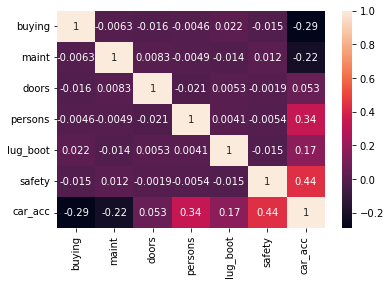

In [11]:
sns.heatmap(train.corr(),annot=True)

In [12]:
x_train = train.drop('car_acc' , axis = 1)
y_train = train['car_acc']
x_test = test.drop('car_acc' , axis = 1)
y_test = test['car_acc']

In [13]:
clf = DecisionTreeClassifier()
clf.fit(x_train ,y_train)
y_pred_train = clf.predict(x_train)
accuracy_score(y_train , y_pred_train)

1.0

In [14]:
print(export_text(clf,feature_names=list(x_train.columns)))

|--- safety <= 1.50
|   |--- class: 1
|--- safety >  1.50
|   |--- persons <= 3.00
|   |   |--- class: 1
|   |--- persons >  3.00
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- safety <= 2.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- doors <= 2.50
|   |   |   |   |   |   |   |--- persons <= 5.00
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- persons >  5.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- doors >  2.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- maint <= 1.50
|   |   |   |   |   |   |   |--- doors <= 3.50
|   |   |   |   |   |   |   |   |--- lug_boot <= 2.50
|   |   |   |   |   |   |   |   |   |--- persons <= 5.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- persons >  5.00
|   |   |   |   |   |   |   |   |   |   |--- doors <= 2.50
| 

[Text(2740.440789473684, 4181.538461538462, 'safety <= 1.5\ngini = 0.457\nsamples = 1382\nvalue = [968, 307, 55, 52]\nclass = unacc'),
 Text(2681.703947368421, 3847.015384615385, 'gini = 0.0\nsamples = 465\nvalue = [465, 0, 0, 0]\nclass = unacc'),
 Text(2799.1776315789475, 3847.015384615385, 'persons <= 3.0\ngini = 0.58\nsamples = 917\nvalue = [503, 307, 55, 52]\nclass = unacc'),
 Text(2740.440789473684, 3512.492307692308, 'gini = 0.0\nsamples = 302\nvalue = [302, 0, 0, 0]\nclass = unacc'),
 Text(2857.9144736842104, 3512.492307692308, 'buying <= 2.5\ngini = 0.629\nsamples = 615\nvalue = [201, 307, 55, 52]\nclass = acc'),
 Text(1721.7236842105262, 3177.969230769231, 'maint <= 2.5\ngini = 0.647\nsamples = 303\nvalue = [37, 159, 55, 52]\nclass = acc'),
 Text(829.6578947368421, 2843.4461538461537, 'safety <= 2.5\ngini = 0.695\nsamples = 154\nvalue = [8, 48, 55, 43]\nclass = good'),
 Text(323.05263157894734, 2508.923076923077, 'lug_boot <= 1.5\ngini = 0.541\nsamples = 74\nvalue = [4, 40, 30

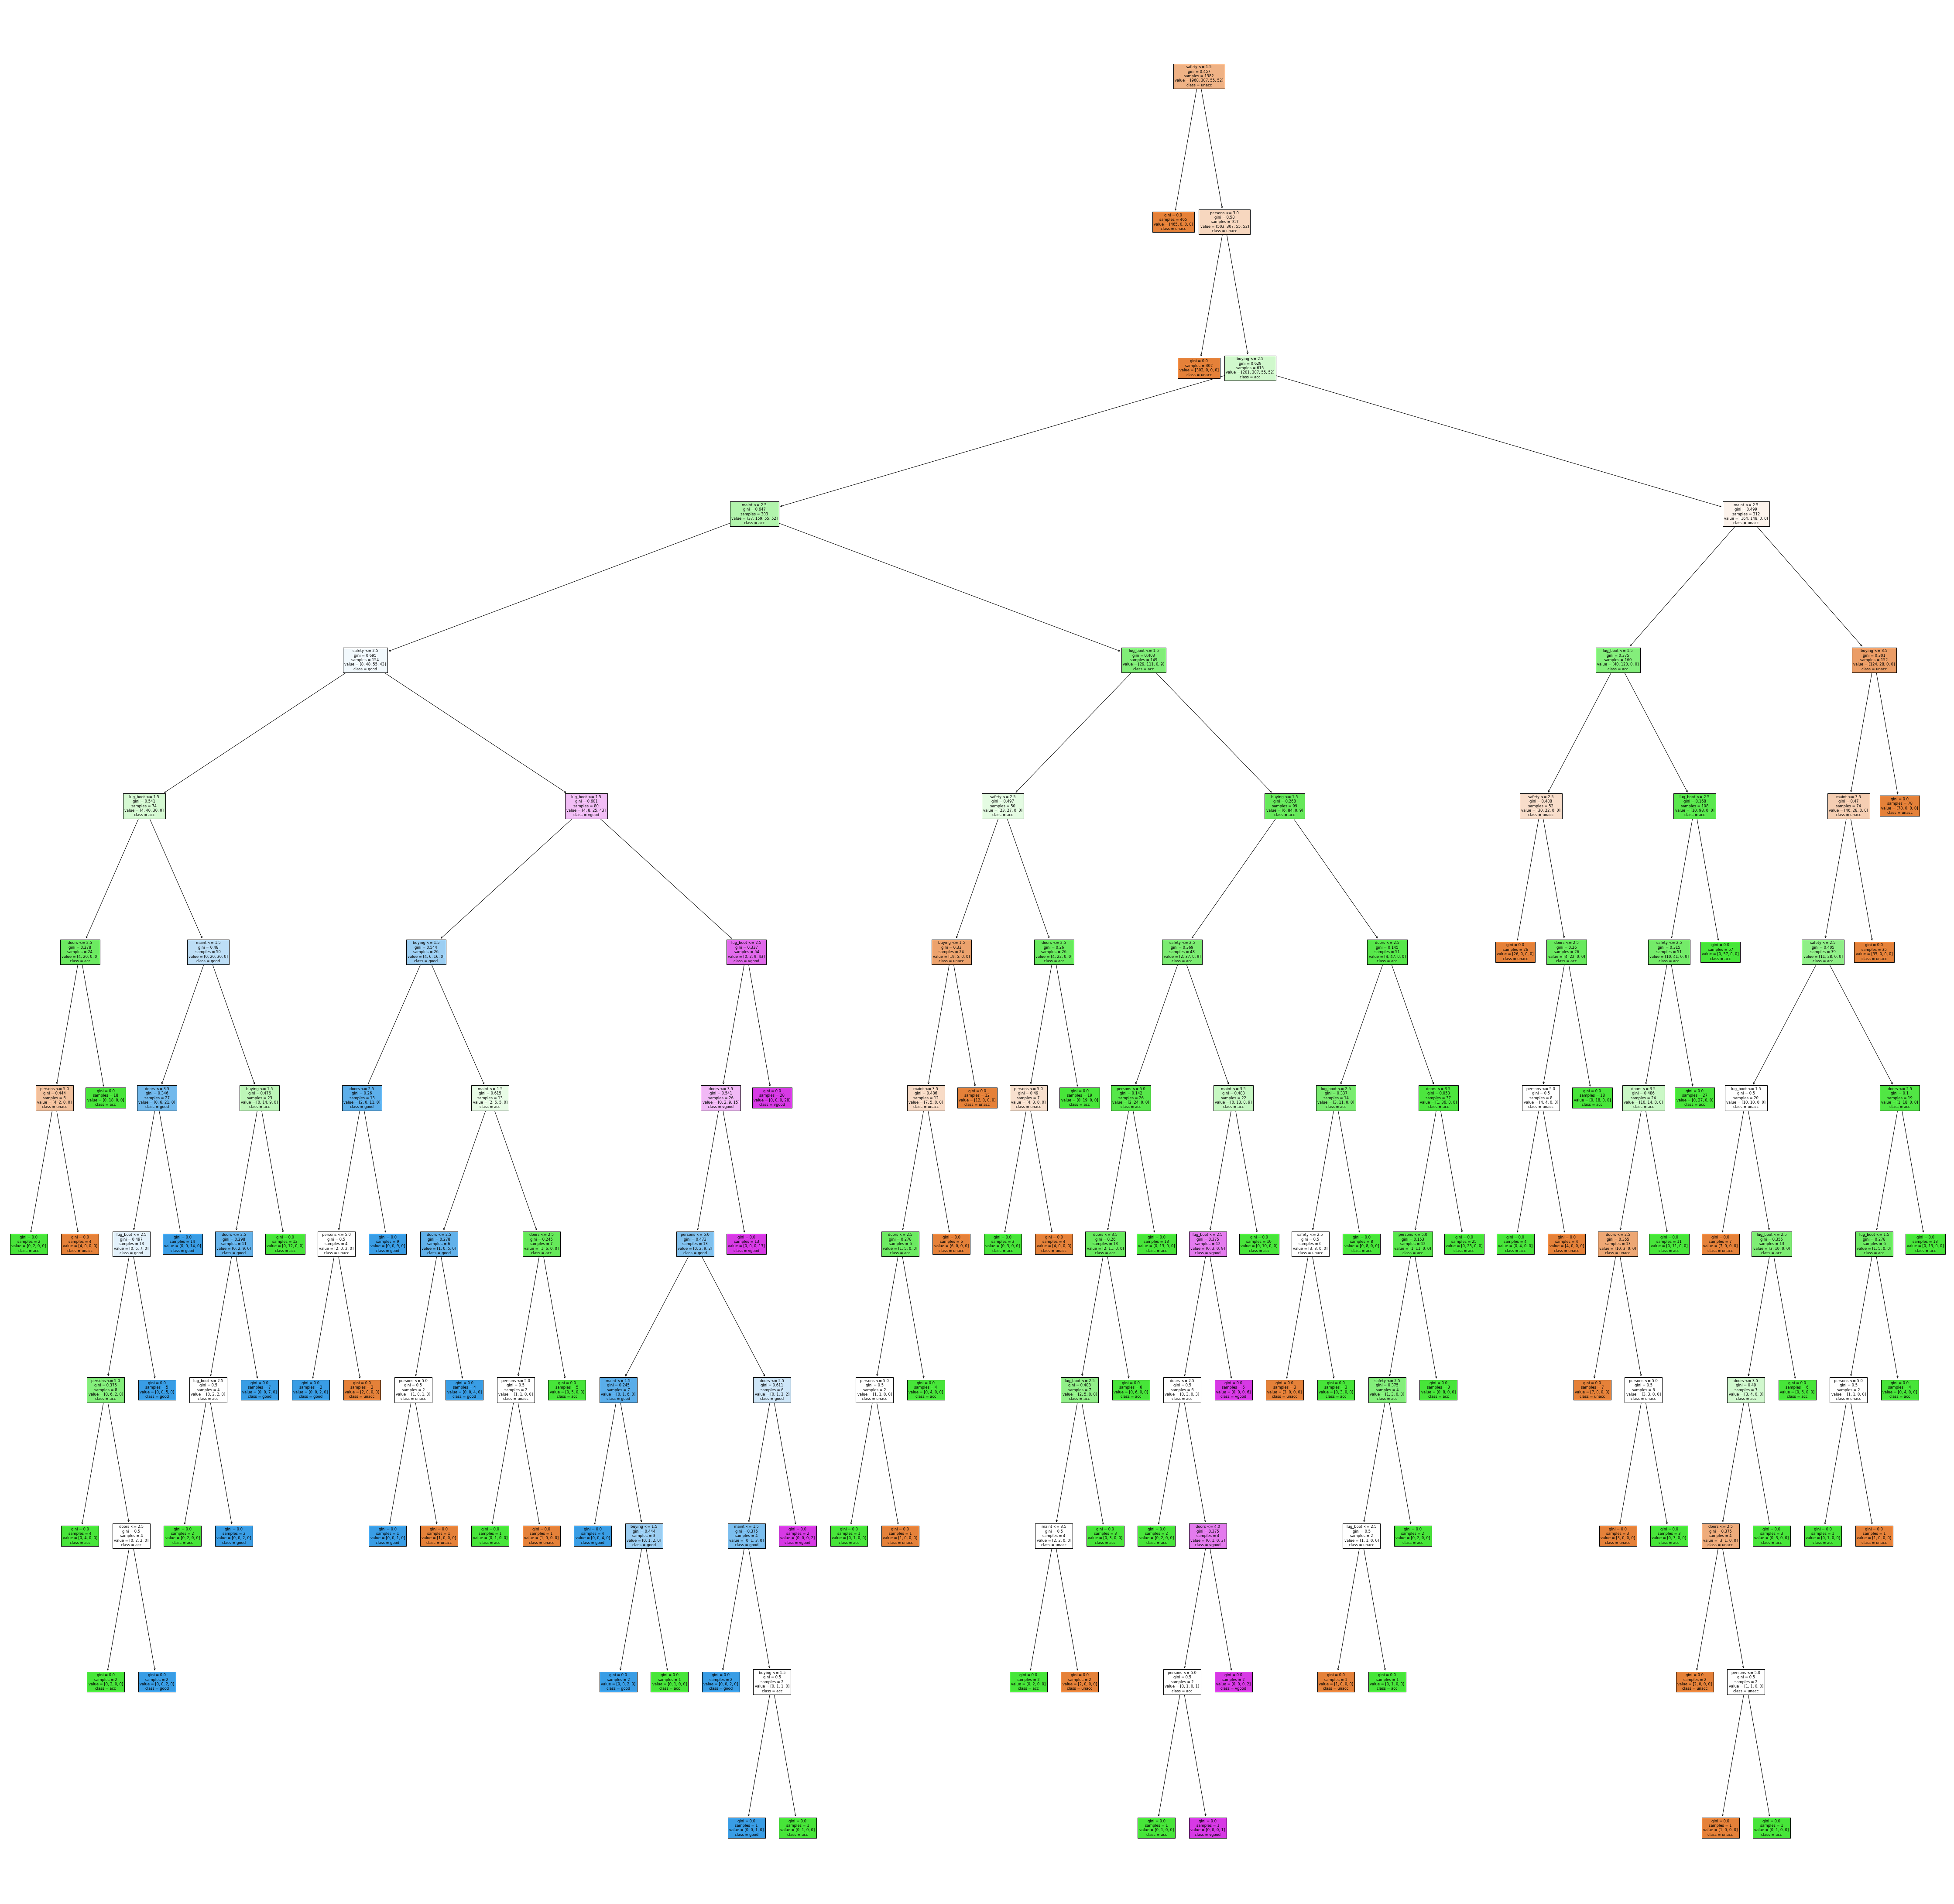

In [17]:
fig = plt.figure(figsize=(80,80))
plot_tree(clf,feature_names=list(x_train.columns),class_names=['unacc','acc','good','vgood'],filled=True)

In [24]:
clf = DecisionTreeClassifier(max_depth=10,min_samples_leaf=4)
clf.fit(x_train ,y_train)
y_pred_train = clf.predict(x_train)
accuracy_score(y_train , y_pred_train)

0.975397973950796

[Text(2657.1428571428573, 4151.127272727273, 'safety <= 1.5\ngini = 0.457\nsamples = 1382\nvalue = [968, 307, 55, 52]\nclass = unacc'),
 Text(2586.285714285714, 3755.7818181818184, 'gini = 0.0\nsamples = 465\nvalue = [465, 0, 0, 0]\nclass = unacc'),
 Text(2728.0, 3755.7818181818184, 'persons <= 3.0\ngini = 0.58\nsamples = 917\nvalue = [503, 307, 55, 52]\nclass = unacc'),
 Text(2657.1428571428573, 3360.4363636363637, 'gini = 0.0\nsamples = 302\nvalue = [302, 0, 0, 0]\nclass = unacc'),
 Text(2798.857142857143, 3360.4363636363637, 'buying <= 2.5\ngini = 0.629\nsamples = 615\nvalue = [201, 307, 55, 52]\nclass = acc'),
 Text(1594.2857142857144, 2965.090909090909, 'maint <= 2.5\ngini = 0.647\nsamples = 303\nvalue = [37, 159, 55, 52]\nclass = acc'),
 Text(814.8571428571429, 2569.745454545455, 'safety <= 2.5\ngini = 0.695\nsamples = 154\nvalue = [8, 48, 55, 43]\nclass = good'),
 Text(318.8571428571429, 2174.4, 'lug_boot <= 1.5\ngini = 0.541\nsamples = 74\nvalue = [4, 40, 30, 0]\nclass = acc'),

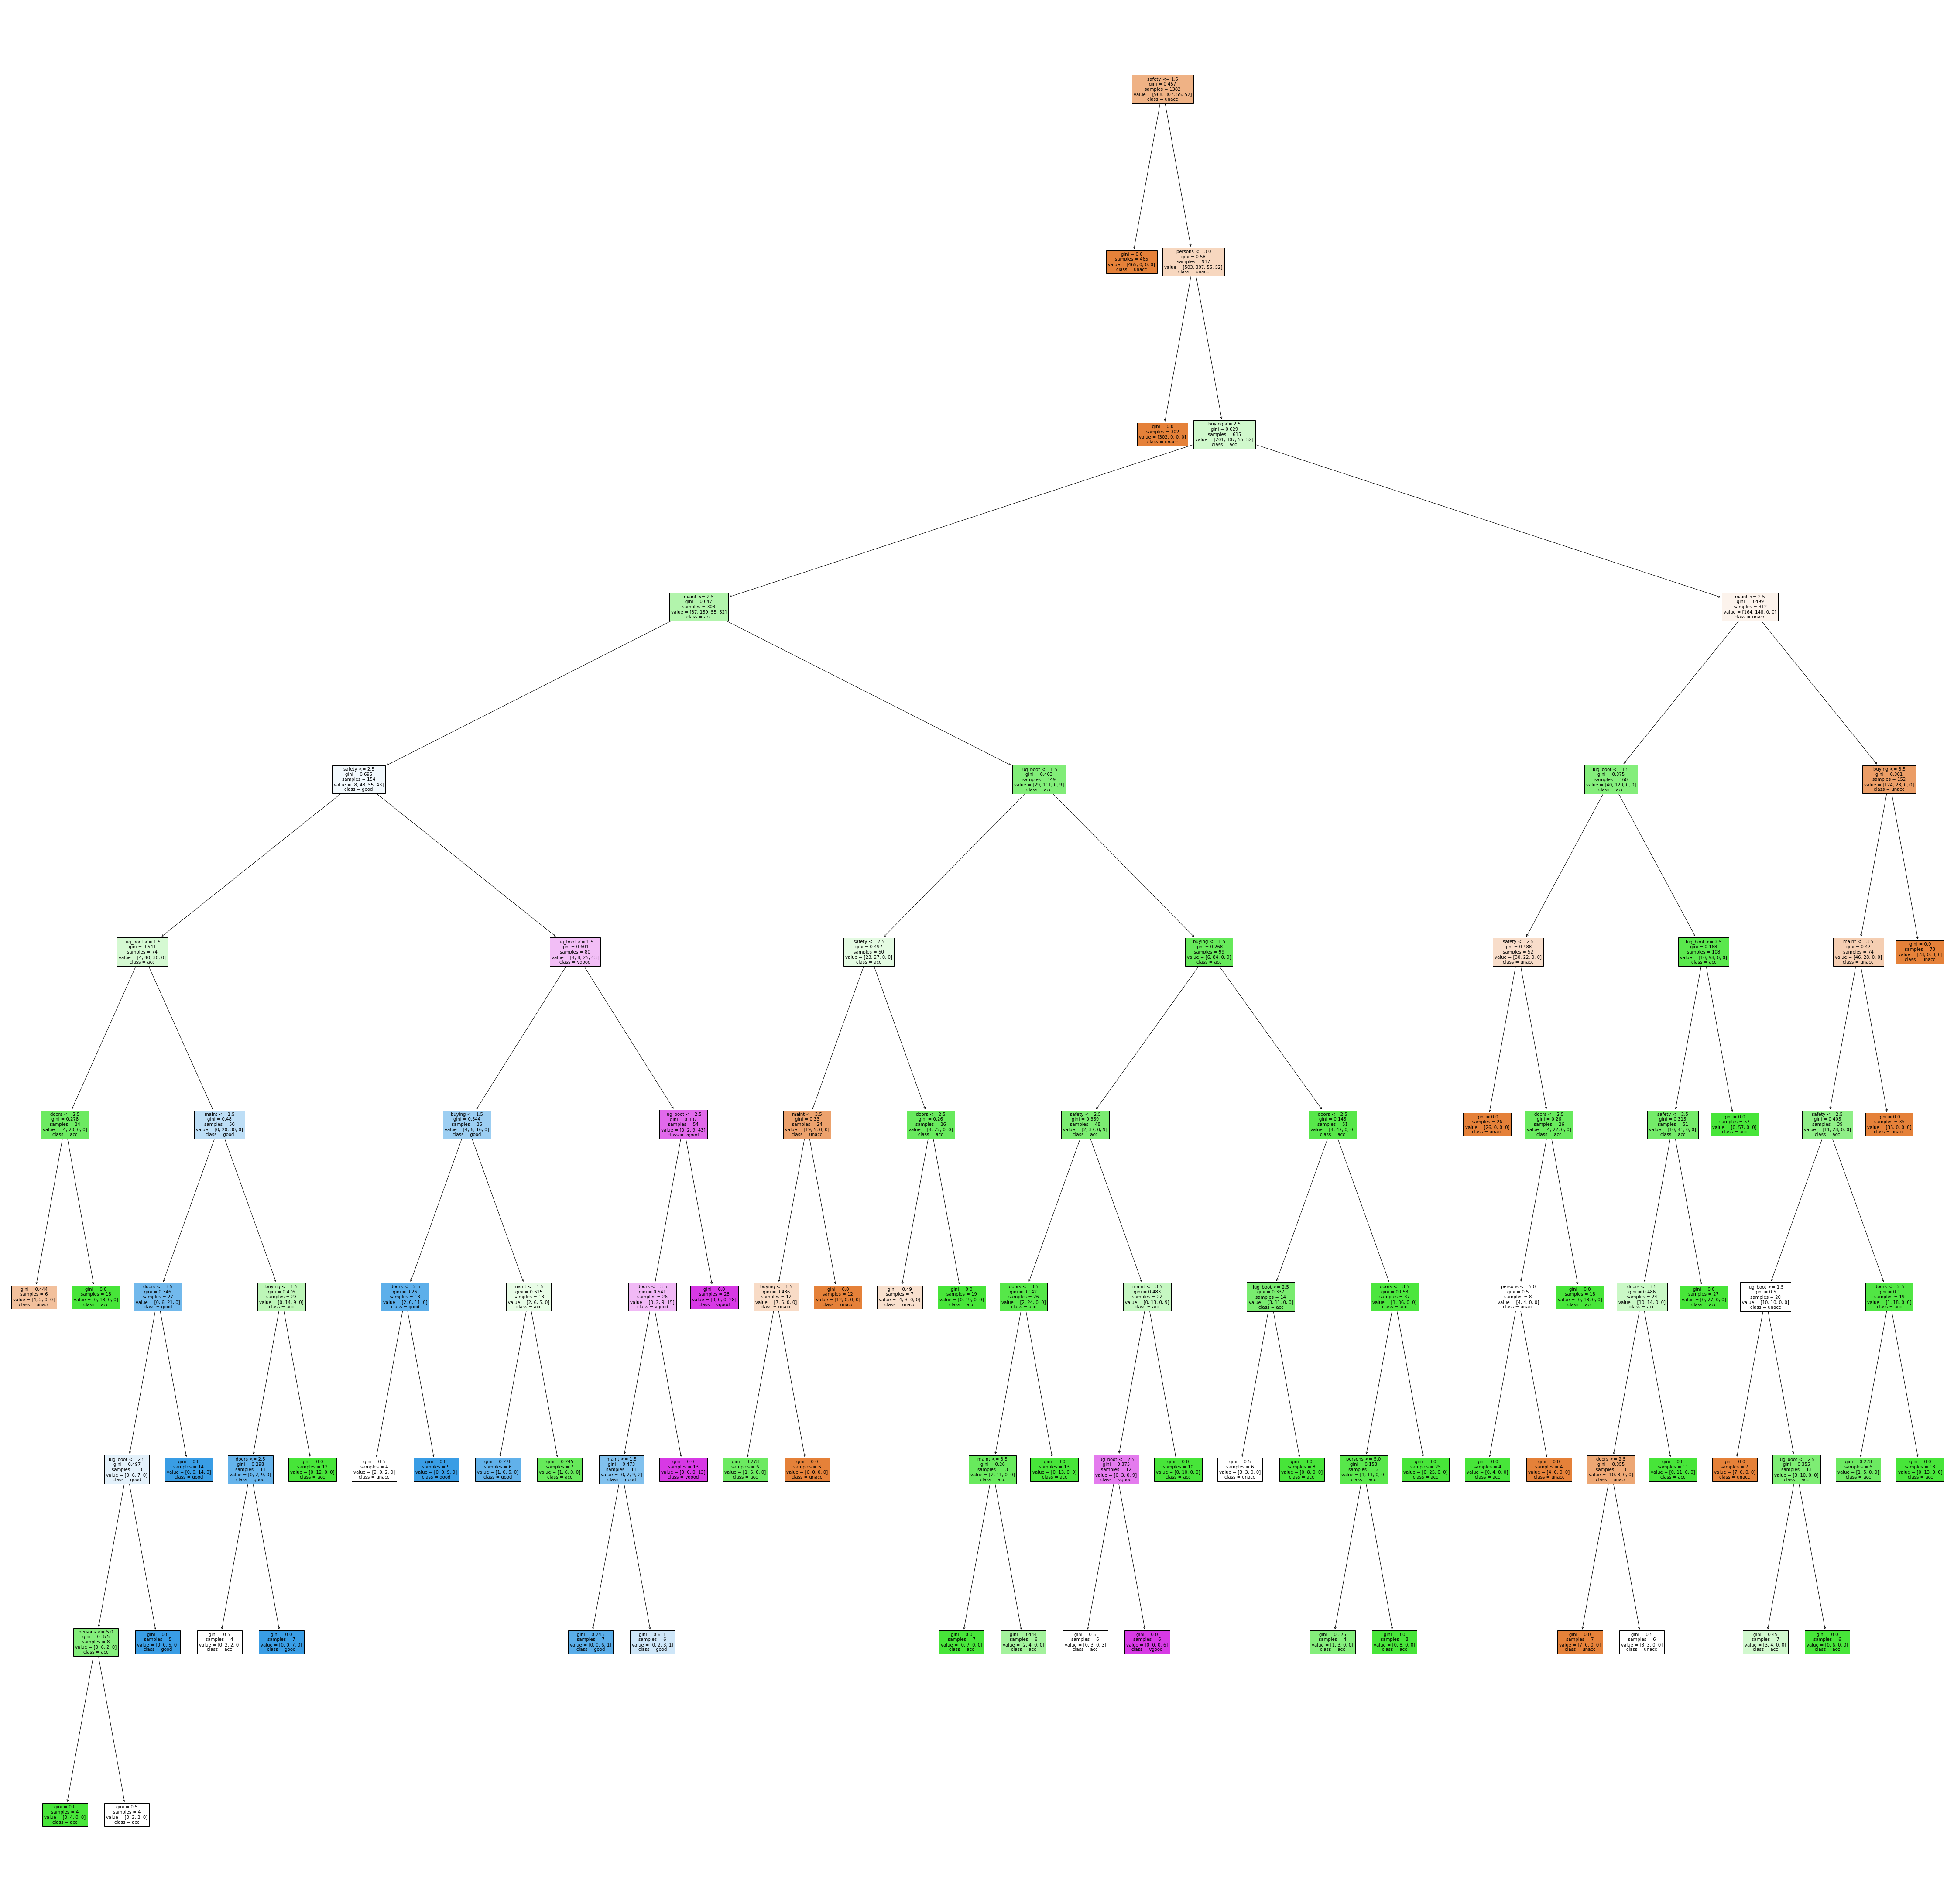

In [25]:
fig = plt.figure(figsize=(80,80))
plot_tree(clf,feature_names=list(x_train.columns),class_names=['unacc','acc','good','vgood'],filled=True)

In [28]:
y_pred_test = clf.predict(x_test)
accuracy_score(y_test , y_pred_test)

0.9624277456647399

In [31]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train ,y_train)
y_pred_train = clf.predict(x_train)
accuracy_score(y_train , y_pred_train)

1.0

In [32]:
y_pred_test = clf.predict(x_test)
accuracy_score(y_test , y_pred_test)

0.9855491329479769

In [39]:
clf = AdaBoostClassifier(random_state=0)
clf.fit(x_train ,y_train)
y_pred_train = clf.predict(x_train)
accuracy_score(y_train , y_pred_train)

0.8632416787264834

In [40]:
y_pred_test = clf.predict(x_test)
accuracy_score(y_test , y_pred_test)

0.8497109826589595

In [41]:
clf = GradientBoostingClassifier(random_state=0 , learning_rate=0.5)
clf.fit(x_train ,y_train)
y_pred_train = clf.predict(x_train)
accuracy_score(y_train , y_pred_train)

1.0

In [42]:
y_pred_test = clf.predict(x_test)
accuracy_score(y_test , y_pred_test)

0.9971098265895953